# MSc Project : analysis 02 complete data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask.array as da
import xesmf as xe
# import netCDF4
import pandas as pd
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
from dask.distributed import Client, Variable
client = Client()
%matplotlib inline

In [2]:
from functions import ccplot, binning

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

In [16]:
mfdata_DIR = './data/GPM_data/*.nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks={'time':500}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [17]:
gpm = gpm.drop_dims('bnds')

In [18]:
gpm = gpm.transpose('time', 'lat', 'lon')

In [19]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(0, 40.25, 0.25)),
                     'lon': (['lon'], np.arange(60, 100.25, 0.25)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 161, lon: 161)
Coordinates:
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
Data variables:
    *empty*

In [20]:
regridder = xe.Regridder(gpm, ds_out, 'bilinear')
# regridder.clean_weight_file()
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_401x401_161x161.nc 
Reuse pre-computed weights? False 
Input grid shape:           (401, 401) 
Output grid shape:          (161, 161) 
Periodic in longitude?      False

In [21]:
precip = regridder(gpm.precipitationCal)

In [22]:
precip = precip.resample(time = '1H').mean()

In [23]:
precip

<xarray.DataArray (time: 5136, lat: 161, lon: 161)>
dask.array<stack, shape=(5136, 161, 161), dtype=float32, chunksize=(1, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 ... 2000-12-31T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.10 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.14 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.17 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.40 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.44 GiB -- Worker memory limit: 1.53 GiB
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.10 GiB -- Worker memory limit: 1.53 GiB
distributed.worker

KilledWorker: ("('open_dataset-78ceadddfcf334f2659083cb86129011precipitationCal-e94bf2068a8931c4ca4ce0e7bd8def24', 0, 0, 0)", <WorkerState 'tcp://127.0.0.1:45325', name: 0, memory: 0, processing: 1>)

distributed.core - ERROR - None
Traceback (most recent call last):
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/core.py", line 575, in handle_stream
    handler(**merge(extra, msg))
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/scheduler.py", line 5010, in client_releases_keys
    self.transitions(recommendations)
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/scheduler.py", line 7054, in transitions
    self.send_all(client_msgs, worker_msgs)
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/scheduler.py", line 5536, in send_all
    w = stream_comms[worker]
KeyError: None
distributed.core - ERROR - Exception while handling op register-client
Traceback (most recent call last):
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/core.py", line 502, in handle_comm
    result = await result
  File "/home/nkv/.miniconda/lib/python3.9/site-packages/distributed/scheduler.py", line 5243, i

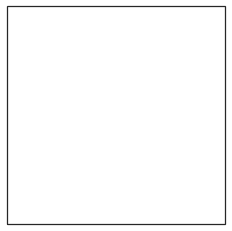

In [24]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
precip.isel(time=0).plot.contourf(ax = ax, extend='neither', levels=10)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [14]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [15]:
era = era.sel(expver=1, drop=True)

In [16]:
era = era.transpose('time', 'latitude', 'longitude')

distributed.worker - WARNING - Worker is at 89% memory usage. Pausing worker.  Process memory: 1.37 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.07 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Worker is at 70% memory usage. Resuming worker. Process memory: 1.07 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 1.27 GiB -- Worker memory limit: 1.53 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.27 GiB -- Worker memory limit: 1.53 GiB
distributed.worke

KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker


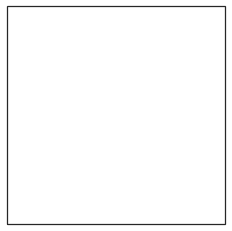

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
era.t2m.isel(time=0).plot(ax = ax, cmap='turbo')
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [67]:
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))

In [68]:
era

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 184800)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...